<a href="https://colab.research.google.com/github/kingspy89/ml_learnings-/blob/main/normaliztion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [3]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

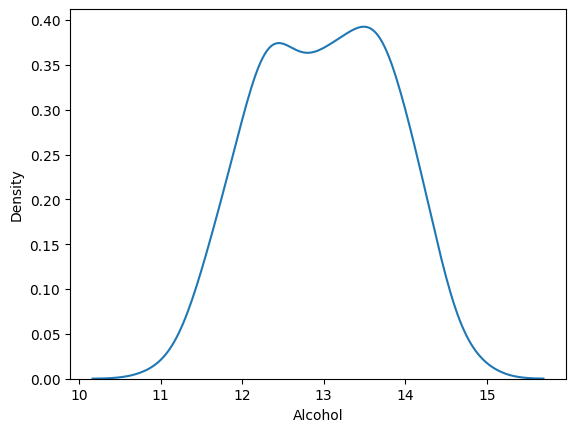

In [5]:
sns.kdeplot(df['Alcohol'])


<Axes: xlabel='Malic acid', ylabel='Density'>

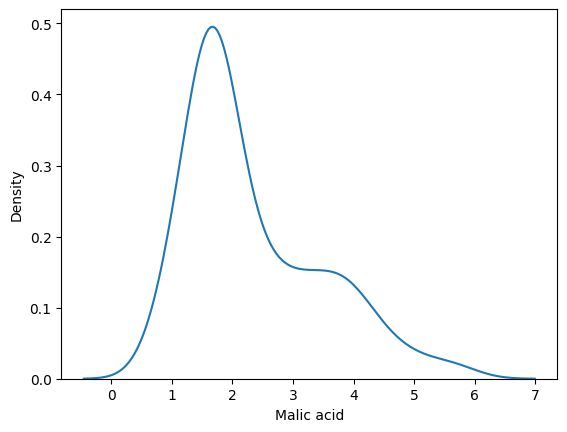

In [6]:
sns.kdeplot(df['Malic acid'])


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

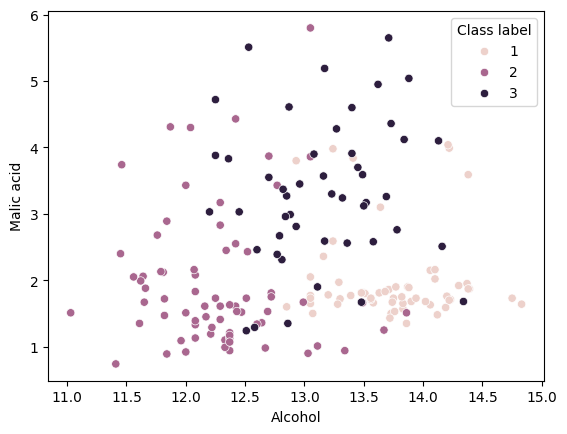

In [12]:
color={1:'red',2:'green',3:'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class label'])

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=0
                                                )

In [14]:
x_train

,Alcohol,Malic acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [17]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [18]:
np.round(x_train_scaled.describe(),2)

,Alcohol,Malic acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


In [20]:
x_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

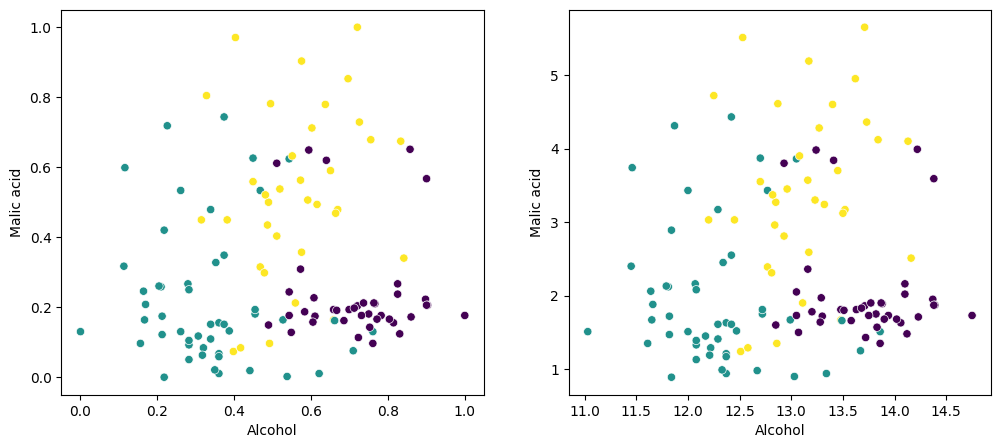

In [22]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.scatterplot(x=x_train_scaled['Alcohol'],y=x_train_scaled['Malic acid'],c=y_train,ax=ax1)

sns.scatterplot(x=x_train['Alcohol'],y=x_train['Malic acid'],c=y_train,ax=ax2)


<Axes: title={'center': 'After Standard Scaling'}, xlabel='Alcohol', ylabel='Density'>

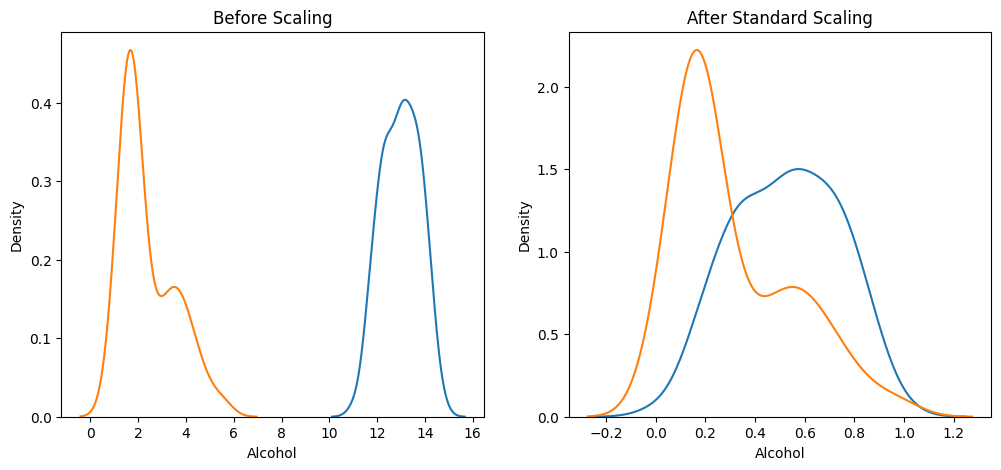

In [25]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)